In [109]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

Importo dei csv test e train in un unico dataframe 

In [110]:
#df_test = pd.read_csv('data/test.csv')
#df_train = pd.read_csv('data/train.csv')
#df = pd.concat([df_test, df_train])

#dataset senza NaN
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Importo del dizionario del dataset

In [111]:
df_dict = pd.read_csv('data/dictionary.csv')
display(df_dict)

,Variable,Definition,Key
0,survival,Survival,"0 = No, 1 = Yes"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,NaN
3,Age,Age in years,NaN
4,sibsp,# of siblings / spouses aboard the Titanic,NaN
5,parch,# of parents / children aboard the Titanic,NaN
6,ticket,Ticket number,NaN
7,fare,Passenger fare,NaN
8,cabin,Cabin number,NaN
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


#### Analizziamo le tipologie di variabili che abbiamo a disposizione.

Variabili **categoriche**:
 - Sex (male/female);
 - Pclass (3rd/2nd/1st);
 - Embarked (port);
 - Survived (true/false).

Variabili **ordinali**:
 - Pclass (3rd/2nd/1st);
 - Sibsp (siblings+spouse);
 - Parch (parents+children).

Variabili **continue**:
 - Age;
 - Fare (price of ticket).

Non considerate:
 - PasssengerId;
 - Name;
 - Cabin.

## Analisi Sopravvissuti (variabile categorica)

In [112]:
df_survived = df['Survived'].value_counts(dropna=False)

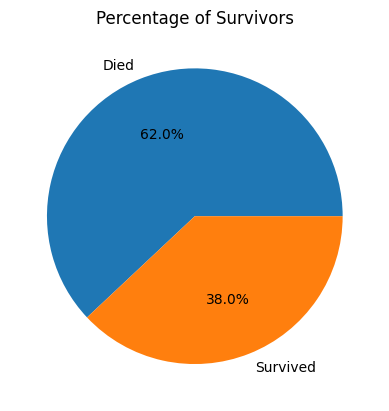

In [113]:

# Data for the pie chart
df_survived_relative = df['Survived'].value_counts(dropna=False, normalize=True) *100
df_survived_relative = df_survived_relative.round()
#labels = list(df_survived_relative.index)
values = list(df_survived_relative)

# Create the pie chart
plt.pie(values, labels=["Died", "Survived"], autopct='%1.1f%%')

# Add a title
plt.title('Percentage of Survivors')

# Display the chart
plt.show()

#### Dall'analisi dei sopravvissuti emerge che la maggior parte non ce l'ha fatta. 
#### Ma entriamo nel dettaglio di quanti maschi e femmine effettivamente hanno perso la vita

In [114]:
#Survivors aggregated by gender e 
gender_survived = df.groupby(by=['Sex', 'Survived'])['Survived'].count()

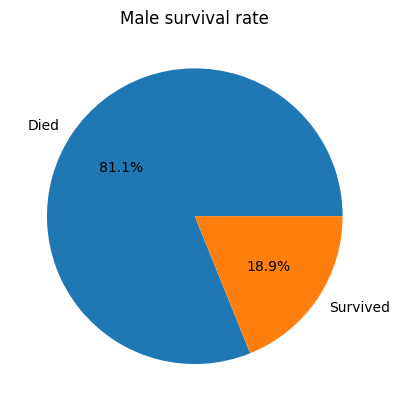

In [115]:
#Male survivors in a pie chart
male_survived = gender_survived.get('male')
plt.title("Male survival rate")
plt.pie(male_survived, labels=["Died", "Survived"], autopct='%1.1f%%')
plt.show()

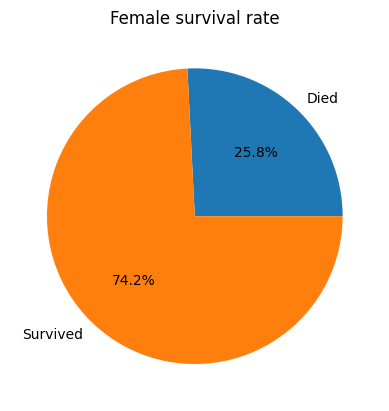

In [116]:
#female survivors in a pie chart
female_survived = gender_survived.get('female')
plt.title("Female survival rate")
plt.pie(female_survived, labels=["Died", "Survived"], autopct='%1.1f%%')
plt.show()

##### Ok in sostanza possiamo notare come la maggior parte dei maschi non sia sopravvissuta mentre la maggior parte delle femmine invece ce l'abbia fatta.
##### Analizziamo un altro tipo di variabile.

## Analisi Classe di appartenza, dalla Prima Classe in giù (variabile categorica).

In [117]:
class_survived = df.groupby(by=['Pclass', 'Survived'])['Survived'].count()

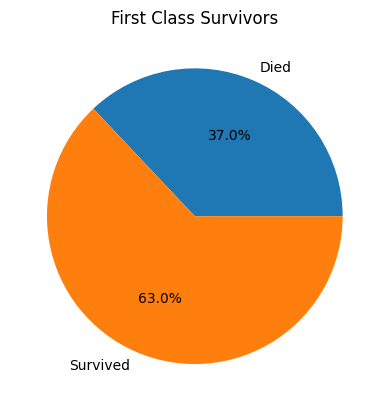

In [118]:
first_class = class_survived.get(1)
plt.title("First Class Survivors")
plt.pie(first_class, labels=["Died", "Survived"], autopct='%1.1f%%')
plt.show()

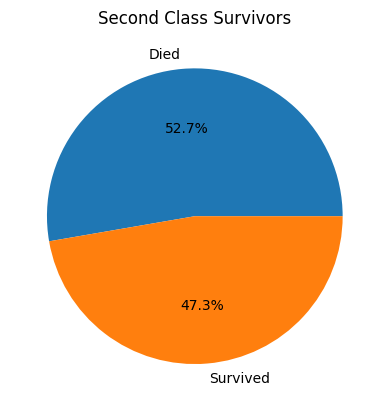

In [119]:
second_class = class_survived.get(2)
plt.title("Second Class Survivors")
plt.pie(second_class, labels=["Died", "Survived"], autopct='%1.1f%%')
plt.show()

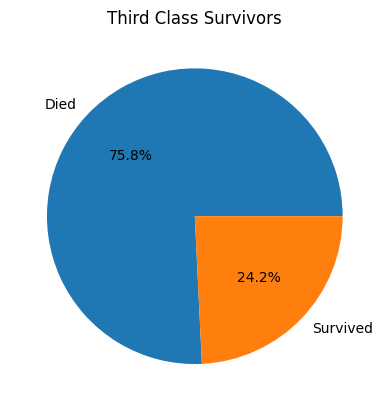

In [120]:
third_class = class_survived.get(3)
plt.title("Third Class Survivors")
plt.pie(third_class, labels=["Died", "Survived"], autopct='%1.1f%%')
plt.show()

#### Apparently, from what we can see, most of the first class survived while most of the third class died.
#### But does the class also influenced gender survival?

In [123]:
class_gender_survived = df.groupby(by=['Pclass', 'Survived', 'Sex'])['Survived'].count()
class_gender_survived

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
Name: Survived, dtype: int64